# Preliminary operations

In [1]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# scikit-plot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

In [3]:
# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import training data
df_data_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")

# get training values
X_train = df_data_train.values
y_train = df_info_train['emotion']

# import test data
df_data_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TEST_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TEST_no_outliers.xlsx", index_col="Unnamed: 0")

# get test values
X_test = df_data_test.values
y_test = df_info_test['emotion']

In [5]:
# get training values
X_train_speech = df_data_train[df_info_train["vocal_channel"] == "speech"].values
y_train_speech = df_info_train.loc[df_info_train["vocal_channel"] == "speech", "emotion"].values

# get training values
X_train_song = df_data_train[df_info_train["vocal_channel"] == "song"].values
y_train_song = df_info_train.loc[df_info_train["vocal_channel"] == "song", "emotion"].values

In [6]:
#print(len(df_info_train))

#rows2remove = np.random.choice(df_info_train.index, len(df_info_train)//2, replace=False)

#print(len(rows2remove))
#rows2remove

In [7]:
rows2remove = [ 306, 1695,  124,  922,  295,  797, 1306,  716,  629, 1688, 1410,
        827, 1255, 1351,   19,  244,  433, 1216,  837, 1180,   16,  958,
        715,  774,   38,  236,  324, 1272, 1579,  161,  591,  143,  785,
         96,  758,  734, 1107,  285,  896, 1730,  262, 1441,  947, 1079,
        395, 1136,  208, 1596,  308, 1583, 1631,   23, 1168, 1103,  406,
       1584,  609,  299,  724,  286,  929,  238,  885,  139, 1581,  983,
       1651,   51,  857,  142,  269, 1169, 1554,  494,  873, 1187, 1662,
        985,  655,  123, 1303,  832, 1256, 1033, 1209, 1404,  846,  474,
       1552, 1577,  174,  332,  312, 1170,  496,  965, 1150,  137, 1001,
       1328, 1024, 1634,   50, 1563, 1406,  557, 1500, 1260,  735, 1536,
        913,  518,  505,  282, 1081,  628,  277,  541,  388,  509, 1304,
       1175,  757,  798, 1570, 1178, 1571,  215, 1616,  742, 1523, 1337,
        386,  855,  187,  843,   18, 1156,  915, 1293,  507, 1433,  348,
       1359, 1123,  813,  171,  830,  297,  754,  611,   39,  185, 1003,
        439,   14, 1664,  809,  704,  479,  428,  125,  666,  199, 1508,
        844,  824,   74,  585,  103,   93,   56,  300, 1343, 1611,  893,
        553,  575, 1428,  195,  930, 1211,   79, 1297, 1602,  391, 1764,
        994,  477,  112, 1076,  919,  159,  838, 1058,  828, 1380, 1407,
       1593,  568,  773,  317,  555, 1284,  232,  687,  589, 1034, 1678,
        658,   47,  803,  584,  472, 1629,  121, 1741,   65,  875,  166,
       1727,  134,  886, 1265, 1693, 1598,   68,    6,  540, 1102, 1468,
         86,   89,  749,  535, 1751, 1066,  747, 1305, 1550, 1546, 1748,
        887,  314,  806,  146,  267,  616,  847,   55,  599, 1724, 1402,
       1294, 1032,  577,  385,  106, 1436,  482,  995,  745, 1624,  283,
        248,  870, 1418, 1609,  399,  331, 1733,  515,  292,  417,  644,
        404,  622,  544, 1566, 1711, 1753, 1572,  480, 1247, 1770,  437,
        512,  105,  117, 1512,  260,  775,  361, 1373, 1356,   71,  133,
        485,  790,  712,  783, 1292, 1628, 1387, 1237,  943, 1316, 1762,
       1612, 1248,  736,  938, 1128,  777,  158,  258,  547,  964, 1220,
       1131, 1108, 1605,  845,  129, 1746,  818, 1575,   53,  310,  110,
        461, 1685, 1309, 1133, 1434, 1167,   57, 1511, 1266,  116,  596,
       1400,  502,  529,  233,   67,  131,  946,  689,  165,  202,  389,
         32,  865,  898,  264,  252,  881, 1228, 1601, 1087,  833, 1269,
       1195,  274,  320, 1395, 1382, 1207, 1335,  200, 1152,    0,  890,
       1179,  407, 1773,  825, 1332, 1532, 1442,  231,  612,  954, 1250,
        909, 1017,  661, 1157, 1194,  743, 1048,  950,  709,  149,  164,
         80, 1233,   37, 1639, 1028,  968,  290, 1443, 1006, 1295, 1390,
        305, 1480, 1064,  942,  268, 1504,  438,  128,  266,  460, 1190,
        594, 1098, 1573,   36,  115,  755, 1603,  224, 1417, 1147,  152,
       1285,  717, 1110, 1490, 1113, 1668,  928, 1126,  649, 1142,  405,
        493, 1510,  230, 1703,  349,  101, 1652,  276,  402, 1464,  760,
        296, 1176, 1738,  784,  465, 1330, 1757,  487, 1346,  720,  588,
       1506,   48,  119,  669,  564,  708,  226,  207,  425, 1318, 1012,
       1525,  318,  554, 1090,  607,  684, 1042, 1172, 1280, 1005, 1138,
       1357,  280, 1731,  700, 1486, 1706,  807, 1474,   73,  549,  866,
        464, 1320, 1431,  981,  431,  910,  436, 1268, 1344, 1421,  653,
        440,  905,    9,  816,  791,  223,  475,    1,  904,  469, 1772,
        273,  626, 1754,  867, 1429, 1725, 1184,  647,  772,   41,  971,
       1654,  503,  975,  889,  321,  190,  926, 1174,  225,  680, 1239,
        560, 1182,  251, 1561,  741, 1492, 1393,   44, 1011,  374, 1430,
       1173,  876, 1369, 1000, 1425, 1105,  639,  281, 1438, 1432,  478,
       1638, 1565, 1289, 1057,  536,  859,  393,  556,  432,  218, 1647,
       1101, 1070,  492,  463,  892,  122, 1342, 1254,  504, 1413,  138,
        695, 1621, 1391, 1023, 1580,   66, 1521, 1047, 1671,  795,   75,
       1578, 1755, 1229,  688,  630,  640, 1035,  765,  229, 1610,  850,
        242, 1010,  154, 1543,  562,  245, 1112, 1719,  590, 1165, 1460,
        313, 1339, 1388,  382,  140, 1002,  390,  831, 1649, 1275,  175,
       1595,   24, 1457, 1096,  701,  346, 1472, 1714, 1728,   42, 1736,
        730, 1454,  204,   13,  150, 1408,  970,  188, 1324,  739,  788,
        239, 1037,  637,  623, 1555, 1767,  367,  723, 1307,  532, 1670,
       1219, 1104,  377,  368,  355,  711,  697,  415,  576, 1050,  668,
        189, 1347,  884, 1750, 1591, 1440,  650,  357,  908,  963,  578,
       1137,  378, 1401,  337, 1665,  698,   85,  168,  241, 1765,  812,
        620,  624,  973,  581,  652,  665, 1286,  842,  350, 1258, 1723,
        325,  104, 1204, 1517, 1127,   77, 1018,  992,  342, 1109, 1210,
        672, 1279,  625,  176,  484,  307,  744,  413,  862, 1676, 1236,
       1077,  839, 1163,   84, 1456,  690, 1498, 1702, 1426, 1560, 1414,
        941, 1520, 1466, 1111,  787, 1162, 1099,   54, 1368,  869, 1267,
       1094,   95, 1203,  621,  566,  212, 1477, 1643,  685, 1334,  434,
       1227,  422,  423,  642, 1590,   99,  449, 1569, 1667,  879, 1515,
       1308, 1462, 1734,  582, 1191, 1375,  246,  691, 1587,  315,  359,
        213,  523,  811,  895,  633, 1188,  491, 1635,   43,  752, 1744,
       1502,  454, 1478,  210,  733, 1119,  160, 1424,  380,  722,  486,
        917, 1620,  148,  221,  900,  940,  897,  235,  113,  211, 1717,
        214,  984,  674, 1302,  272, 1080,  470, 1148, 1659,  362,  483,
       1640,  746,  453,  354, 1100,  254, 1213, 1198,  725, 1501,   90,
       1630,  769,  713,   10, 1338, 1729,  519, 1040, 1385,  182,  817,
       1063, 1534, 1073,   94,  598, 1092,  732,   20, 1707,  782,   97,
        430, 1143, 1594, 1071,  618, 1377,  278, 1518,  353,  467, 1559,
        525,  304,  114, 1242, 1221, 1144,  384, 1558, 1139, 1166,  671,
        645, 1124, 1467, 1409, 1217,  473, 1704, 1735, 1004]

# get new training dataset
df2_data_train = df_data_train.drop(index=rows2remove, axis=0)
df2_info_train = df_info_train.drop(index=rows2remove, axis=0)

# get training values
X_train_50 = df2_data_train.values
y_train_50 = df2_info_train['emotion']

#Random Forest

## Hyperparameter tuning

In [ ]:
# get LinearSVC
clf = RandomForestClassifier(
    random_state=0, 
) 

# defining parameter range
param_grid = {
    "n_estimators": [10, 100, 1000],
    "criterion": ["gini", "entropy", "log_loss"],
} 

RSKF = RepeatedStratifiedKFold(
    n_splits=10,  
    n_repeats=3,
    random_state=0
)

grid = RandomizedSearchCV(
    clf,
    n_iter=25,
    param_distributions = param_grid,
    cv=RSKF,
    n_jobs = -1,
    refit = True,
    verbose=2,
    random_state=0
)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 30 folds for each of 9 candidates, totalling 270 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=25. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=0),
                   estimator=RandomForestClassifier(random_state=0), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'n_estimators': [10, 100, 1000]},
                   random_state=0, verbose=2)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print(grid.best_score_)

{'n_estimators': 1000, 'criterion': 'entropy'}
RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)
0.6100181975919929


In [ ]:
grid_scores = pd.DataFrame(grid.cv_results_)
grid_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.209533,0.058186,0.004757,0.001112,10,gini,"{'n_estimators': 10, 'criterion': 'gini'}",0.438202,0.421348,0.488764,...,0.432584,0.500000,0.432584,0.460674,0.382022,0.350282,0.485876,0.434935,0.036218,7
1,2.164744,0.827682,0.033764,0.012362,100,gini,"{'n_estimators': 100, 'criterion': 'gini'}",0.584270,0.573034,0.606742,...,0.617978,0.601124,0.550562,0.584270,0.539326,0.531073,0.587571,0.577981,0.029394,6
2,20.909787,1.195973,0.288459,0.075548,1000,gini,"{'n_estimators': 1000, 'criterion': 'gini'}",0.623596,0.584270,0.651685,...,0.601124,0.634831,0.567416,0.646067,0.556180,0.559322,0.638418,0.605158,0.032608,3
3,0.350738,0.007950,0.004350,0.000523,10,entropy,"{'n_estimators': 10, 'criterion': 'entropy'}",0.415730,0.393258,0.443820,...,0.483146,0.410112,0.432584,0.455056,0.460674,0.423729,0.423729,0.431923,0.043473,8
4,4.091602,0.785658,0.028145,0.011845,100,entropy,"{'n_estimators': 100, 'criterion': 'entropy'}",0.601124,0.578652,0.606742,...,0.561798,0.573034,0.589888,0.573034,0.589888,0.525424,0.598870,0.587163,0.027187,4
5,40.998505,0.903918,0.276334,0.081673,1000,entropy,"{'n_estimators': 1000, 'criterion': 'entropy'}",0.612360,0.584270,0.674157,...,0.584270,0.651685,0.561798,0.668539,0.612360,0.542373,0.621469,0.610018,0.033169,1
6,0.352905,0.011397,0.004953,0.001780,10,log_loss,"{'n_estimators': 10, 'criterion': 'log_loss'}",0.415730,0.393258,0.443820,...,0.483146,0.410112,0.432584,0.455056,0.460674,0.423729,0.423729,0.431923,0.043473,8
7,4.107517,0.890671,0.027663,0.008621,100,log_loss,"{'n_estimators': 100, 'criterion': 'log_loss'}",0.601124,0.578652,0.606742,...,0.561798,0.573034,0.589888,0.573034,0.589888,0.525424,0.598870,0.587163,0.027187,4
8,40.993924,0.855497,0.263020,0.089824,1000,log_loss,"{'n_estimators': 1000, 'criterion': 'log_loss'}",0.612360,0.584270,0.674157,...,0.584270,0.651685,0.561798,0.668539,0.612360,0.542373,0.621469,0.610018,0.033169,1


In [ ]:
grid_scores.to_excel("tuning_scores_RandomForest.xlsx")

###Model Behavior

In [ ]:
grid_scores = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Classification/Tuning data/tuning_scores_RandomForest.xlsx", index_col="Unnamed: 0")

In [ ]:
grid_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.209533,0.058186,0.004757,0.001112,10,gini,"{'n_estimators': 10, 'criterion': 'gini'}",0.438202,0.421348,0.488764,...,0.432584,0.500000,0.432584,0.460674,0.382022,0.350282,0.485876,0.434935,0.036218,7
1,2.164744,0.827682,0.033764,0.012362,100,gini,"{'n_estimators': 100, 'criterion': 'gini'}",0.584270,0.573034,0.606742,...,0.617978,0.601124,0.550562,0.584270,0.539326,0.531073,0.587571,0.577981,0.029394,6
2,20.909787,1.195973,0.288459,0.075548,1000,gini,"{'n_estimators': 1000, 'criterion': 'gini'}",0.623596,0.584270,0.651685,...,0.601124,0.634831,0.567416,0.646067,0.556180,0.559322,0.638418,0.605158,0.032608,3
3,0.350738,0.007950,0.004350,0.000523,10,entropy,"{'n_estimators': 10, 'criterion': 'entropy'}",0.415730,0.393258,0.443820,...,0.483146,0.410112,0.432584,0.455056,0.460674,0.423729,0.423729,0.431923,0.043473,8
4,4.091602,0.785658,0.028145,0.011845,100,entropy,"{'n_estimators': 100, 'criterion': 'entropy'}",0.601124,0.578652,0.606742,...,0.561798,0.573034,0.589888,0.573034,0.589888,0.525424,0.598870,0.587163,0.027187,4
5,40.998505,0.903918,0.276334,0.081673,1000,entropy,"{'n_estimators': 1000, 'criterion': 'entropy'}",0.612360,0.584270,0.674157,...,0.584270,0.651685,0.561798,0.668539,0.612360,0.542373,0.621469,0.610018,0.033169,1
6,0.352905,0.011397,0.004953,0.001780,10,log_loss,"{'n_estimators': 10, 'criterion': 'log_loss'}",0.415730,0.393258,0.443820,...,0.483146,0.410112,0.432584,0.455056,0.460674,0.423729,0.423729,0.431923,0.043473,8
7,4.107517,0.890671,0.027663,0.008621,100,log_loss,"{'n_estimators': 100, 'criterion': 'log_loss'}",0.601124,0.578652,0.606742,...,0.561798,0.573034,0.589888,0.573034,0.589888,0.525424,0.598870,0.587163,0.027187,4
8,40.993924,0.855497,0.263020,0.089824,1000,log_loss,"{'n_estimators': 1000, 'criterion': 'log_loss'}",0.612360,0.584270,0.674157,...,0.584270,0.651685,0.561798,0.668539,0.612360,0.542373,0.621469,0.610018,0.033169,1


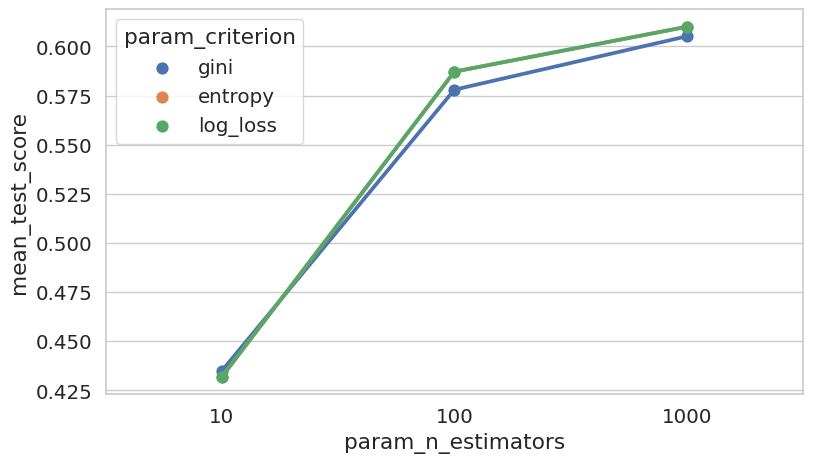

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.pointplot(
    data=grid_scores, 
    x="param_n_estimators", 
    y="mean_test_score",
    hue="param_criterion"
)

plt.savefig("Random-Forest_n_estimators.svg")

##Classification

### All

In [8]:
# get LinearSVC
clf = RandomForestClassifier(
    criterion='entropy', 
    n_estimators=1000, 
    random_state=0
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('ROC-AUC %s' % roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr"))
print(classification_report(y_test, y_pred))

Accuracy 0.4318936877076412
ROC-AUC 0.856503591864106
              precision    recall  f1-score   support

       angry       0.49      0.79      0.60        94
        calm       0.48      0.59      0.53        91
     disgust       0.37      0.33      0.35        48
     fearful       0.46      0.23      0.30        92
       happy       0.38      0.38      0.38        93
     neutral       0.55      0.13      0.21        46
         sad       0.34      0.33      0.34        94
   surprised       0.41      0.52      0.46        44

    accuracy                           0.43       602
   macro avg       0.43      0.41      0.40       602
weighted avg       0.43      0.43      0.41       602



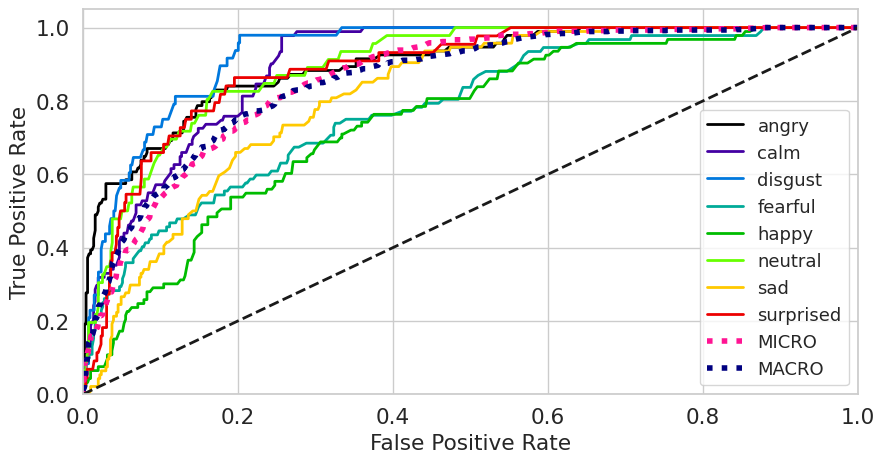

In [9]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_roc(
    y_test, 
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("Random-Forest_ROC.svg", format="svg")

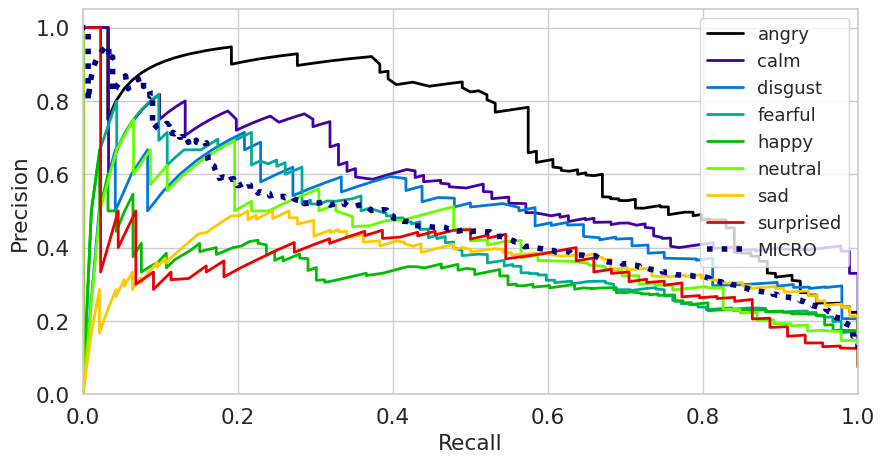

In [10]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_precision_recall(
    y_test, 
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("Random-Forest_Precision_Recall.svg", format="svg")

####Feature Importances

In [11]:
feat_imp = abs(clf.feature_importances_)

df_feat_imp = pd.DataFrame(feat_imp, index=df_data_train.columns, columns=["importance"])
df_feat_imp = df_feat_imp.sort_values("importance", ascending=False)
df_feat_imp

,importance
std,0.040315
mfcc_kur,0.037422
mfcc_kur_w2,0.025739
mfcc_mean,0.023353
mfcc_sum,0.020817
...,...
q50_w2,0.004074
lag1_sum,0.003031
q25_w4,0.002577
q25_w1,0.002087


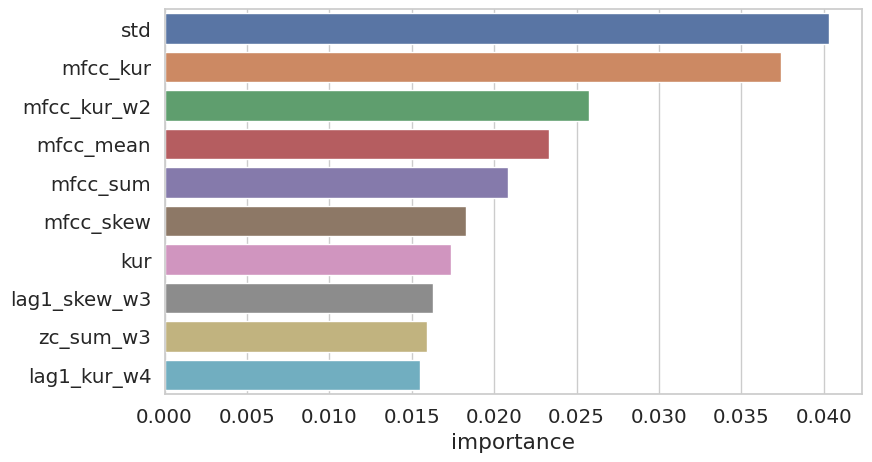

In [12]:
sns.set(rc={'figure.figsize':(9, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.barplot(
    data =df_feat_imp[:10],
    x="importance", 
    y=df_feat_imp.index[:10], 
    orient='h',
    )

plt.savefig("Random-Forest_features.svg")

### All (50%)

In [13]:
# get LinearSVC
clf = RandomForestClassifier(
    criterion='entropy', 
    n_estimators=1000, 
    random_state=0
)

clf.fit(X_train_50, y_train_50)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('ROC-AUC %s' % roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr"))
print(classification_report(y_test, y_pred))

Accuracy 0.446843853820598
ROC-AUC 0.8456161945531638
              precision    recall  f1-score   support

       angry       0.51      0.77      0.61        94
        calm       0.53      0.68      0.60        91
     disgust       0.44      0.33      0.38        48
     fearful       0.49      0.30      0.38        92
       happy       0.40      0.40      0.40        93
     neutral       0.67      0.17      0.28        46
         sad       0.30      0.29      0.29        94
   surprised       0.35      0.43      0.38        44

    accuracy                           0.45       602
   macro avg       0.46      0.42      0.41       602
weighted avg       0.45      0.45      0.43       602



### Just Speech

In [14]:
# get LinearSVC
clf = RandomForestClassifier(
    criterion='entropy', 
    n_estimators=1000, 
    random_state=0
)

clf.fit(X_train_speech, y_train_speech)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('ROC-AUC %s' % roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr"))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

Accuracy 0.31727574750830567
ROC-AUC 0.7682334416131271
              precision    recall  f1-score   support

       angry       0.53      0.65      0.58        94
        calm       0.48      0.32      0.38        91
     disgust       0.12      0.60      0.21        48
     fearful       0.47      0.17      0.25        92
       happy       0.35      0.19      0.25        93
     neutral       0.00      0.00      0.00        46
         sad       0.31      0.16      0.21        94
   surprised       0.40      0.52      0.45        44

    accuracy                           0.32       602
   macro avg       0.33      0.33      0.29       602
weighted avg       0.37      0.32      0.31       602



### Just Song

In [16]:
# get LinearSVC
clf = RandomForestClassifier(
    criterion='entropy', 
    n_estimators=1000, 
    random_state=0
)

clf.fit(X_train_song, y_train_song)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('ROC-AUC %s' % roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", labels=np.unique(y_pred)))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

Accuracy 0.3438538205980066


ValueError: ignored